# Census income
## Exploracyjna analiza danych

## 1. Importowanie zbioru danych

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, OneHotEncoder, FunctionTransformer

In [2]:
data = pd.read_csv ('census_income_dataset.csv')
data

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income_level
0,39,State-gov,77516.0,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,83311.0,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,215646.0,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,234721.0,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,338409.0,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419.0,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0.0,0.0,36.0,United-States,<=50K
48838,64,?,321403.0,HS-grad,9,Widowed,?,Other-relative,Black,Male,0.0,0.0,40.0,United-States,<=50K
48839,38,Private,374983.0,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K
48840,44,Private,83891.0,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455.0,0.0,40.0,United-States,<=50K


## 2. Informacje o danych

In [3]:
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income_level'],
      dtype='object')

Opis kolumn:

In [4]:
attr = pd.read_csv("attributes_census_income.csv")
with pd.option_context('display.max_colwidth', 400):
    display(attr)

,name,type,description
0,age,integer,age of individual
1,workclass,string,"Values: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked"
2,fnlwgt,float,Final sampling weight. Inverse of sampling fraction adjusted for non-response and over or under sampling of particular groups
3,education,string,"Values: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool"
4,education_num,integer,NaN
5,marital_status,string,"Values: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse"
6,occupation,string,"Values: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces"
7,relationship,string,"Values: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried"
8,race,string,"Values: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black"
9,sex,string,"Values: Female, Male"


In [5]:
data.drop("fnlwgt", axis=1, inplace=True)

Zmienna `fnlwgt` to zmienna statystyczna, nie będzie potrzeba do budowy modelu.

### Braki danych

In [6]:
print(f'{data[(data == "?").any(axis = 1)].shape[0]}')

3620


In [7]:
data[data == "?"] = np.nan

In [8]:
data.isna().sum()

age                  0
workclass         2799
education            0
education_num        0
marital_status       0
occupation        2809
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     857
income_level         0
dtype: int64

In [9]:
data[data["workclass"].isna() & data["occupation"].isna()]

,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income_level
27,54,NaN,Some-college,10,Married-civ-spouse,NaN,Husband,Asian-Pac-Islander,Male,0.0,0.0,60.0,South,>50K
61,32,NaN,7th-8th,4,Married-spouse-absent,NaN,Not-in-family,White,Male,0.0,0.0,40.0,NaN,<=50K
69,25,NaN,Some-college,10,Never-married,NaN,Own-child,White,Male,0.0,0.0,40.0,United-States,<=50K
77,67,NaN,10th,6,Married-civ-spouse,NaN,Husband,White,Male,0.0,0.0,2.0,United-States,<=50K
106,17,NaN,10th,6,Never-married,NaN,Own-child,White,Female,34095.0,0.0,32.0,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48682,61,NaN,Some-college,10,Married-civ-spouse,NaN,Husband,White,Male,0.0,0.0,14.0,United-States,<=50K
48769,21,NaN,Some-college,10,Never-married,NaN,Own-child,White,Female,0.0,0.0,30.0,United-States,<=50K
48800,73,NaN,HS-grad,9,Married-civ-spouse,NaN,Husband,White,Male,0.0,0.0,25.0,Canada,<=50K
48812,81,NaN,Assoc-voc,11,Married-civ-spouse,NaN,Husband,White,Male,2936.0,0.0,20.0,United-States,<=50K


Tam gdzie mamy brak w `workclass` mamy też brak w `occupation`, ale to wydaje sie naturalne.

#### Wypełnianie zmiennych z brakami
W porzedniej wersji wiersze z brakami usuwaliśmy. Jednak po przeanalizowaniu problemu, postanowiliśmy braki danych wypełnić modami zmiennych.

In [10]:
print(data.mode().iloc[0])
data = data.fillna(data.mode().iloc[0])
data.head()

age                               36
workclass                    Private
education                    HS-grad
education_num                      9
marital_status    Married-civ-spouse
occupation            Prof-specialty
relationship                 Husband
race                           White
sex                             Male
capital_gain                     0.0
capital_loss                     0.0
hours_per_week                  40.0
native_country         United-States
income_level                   <=50K
Name: 0, dtype: object


,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income_level
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K


In [11]:
data.isna().sum()

age               0
workclass         0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income_level      0
dtype: int64

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             48842 non-null  int64  
 1   workclass       48842 non-null  object 
 2   education       48842 non-null  object 
 3   education_num   48842 non-null  int64  
 4   marital_status  48842 non-null  object 
 5   occupation      48842 non-null  object 
 6   relationship    48842 non-null  object 
 7   race            48842 non-null  object 
 8   sex             48842 non-null  object 
 9   capital_gain    48842 non-null  float64
 10  capital_loss    48842 non-null  float64
 11  hours_per_week  48842 non-null  float64
 12  native_country  48842 non-null  object 
 13  income_level    48842 non-null  object 
dtypes: float64(3), int64(2), object(9)
memory usage: 5.2+ MB


`education_num` określa poziom edukacji, natomiast `education` to wyrażony słownie poziom edukacji.

In [13]:
education_list = []
for i, name in data.groupby(["education_num", "education"]).groups.keys():
    education_list += [name]

data["education"] = pd.Categorical(data["education"], 
                                categories=education_list, ordered=True)
data

,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income_level
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0.0,0.0,36.0,United-States,<=50K
48838,64,Private,HS-grad,9,Widowed,Prof-specialty,Other-relative,Black,Male,0.0,0.0,40.0,United-States,<=50K
48839,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K
48840,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455.0,0.0,40.0,United-States,<=50K


## 3. Rozkłady zmiennych

### Zmienne ilościowe

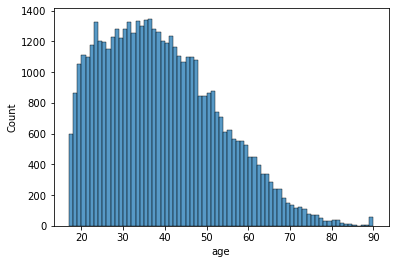

In [14]:
duration_dist = sns.histplot(data['age'],  binwidth = 1)
plt.show()

Rozkład przypomina w miarę normalny, z odcięciem przy 16 roku życia, wszystkim powyżej 90 roku życia przypisano wartość wieku 90.

Przy zmiennych `capital_gain` i `capital_loss` przeważa wartość 0 (która nie wnosi dużo informacji), więc zostanie pominięta.

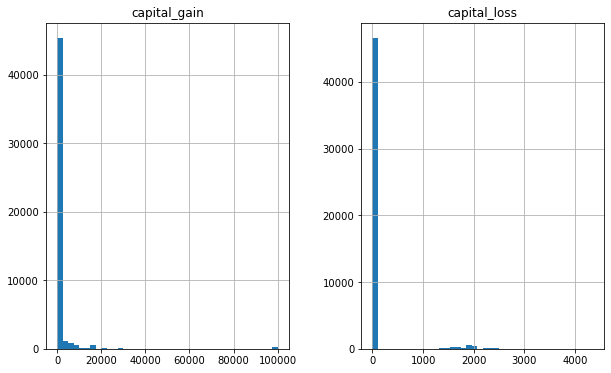

In [15]:
data[["capital_gain", "capital_loss"]].hist(bins = 40, figsize = (10, 6))
plt.show()

Po pominięciu rekordów:

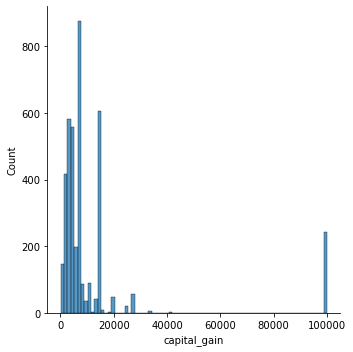

In [16]:
sns.displot(data = data[data["capital_gain"]>0], x = "capital_gain")
plt.show()

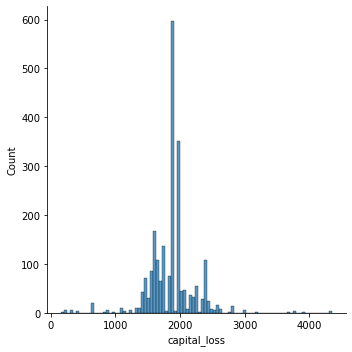

In [17]:
sns.displot(data = data[data["capital_loss"]>0], x = "capital_loss")
plt.show()

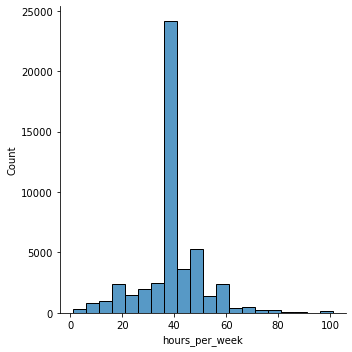

In [18]:
sns.displot(data = data, x = "hours_per_week", binwidth = 5)
plt.show()

### Zmienne jakościowe

<AxesSubplot:xlabel='count', ylabel='workclass'>

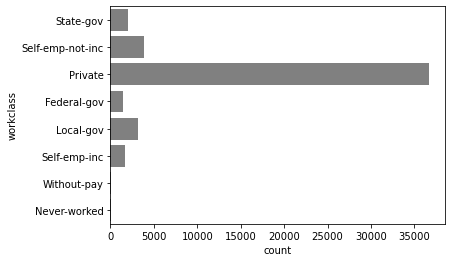

In [19]:
sns.countplot(y='workclass',data=data, color='gray')

<AxesSubplot:xlabel='count', ylabel='education'>

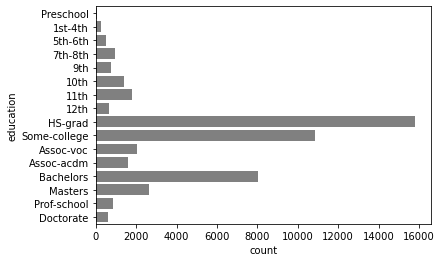

In [20]:
sns.countplot(y='education',data=data, color='gray')

<AxesSubplot:xlabel='count', ylabel='marital_status'>

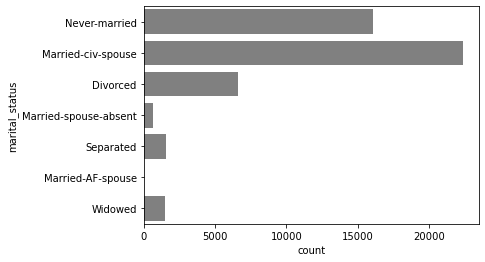

In [21]:
sns.countplot(y='marital_status',data=data, color='gray')

<AxesSubplot:xlabel='count', ylabel='relationship'>

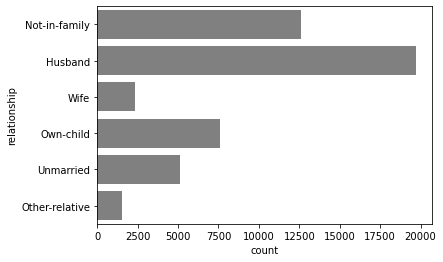

In [22]:
sns.countplot(y='relationship',data=data, color='gray')

<AxesSubplot:xlabel='count', ylabel='race'>

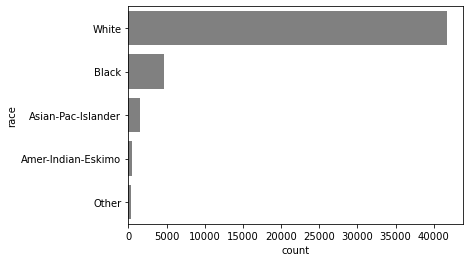

In [23]:
sns.countplot(y='race',data=data, color='gray')

<AxesSubplot:xlabel='count', ylabel='sex'>

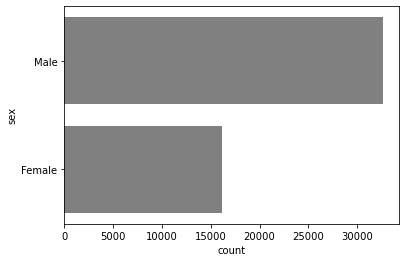

In [24]:
sns.countplot(y='sex',data=data, color='gray')

<AxesSubplot:xlabel='count', ylabel='native_country'>

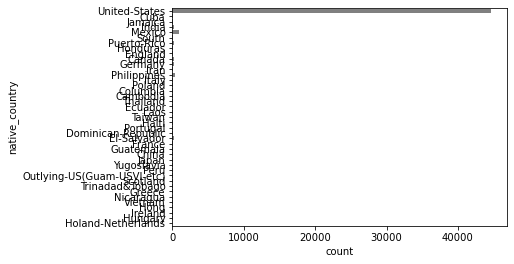

In [25]:
sns.countplot(y='native_country',data=data, color='gray')

<AxesSubplot:xlabel='count', ylabel='native_country'>

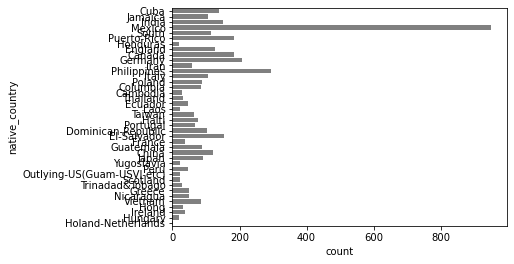

In [26]:
sns.countplot(y='native_country',data=data[data['native_country'] != 'United-States'], color='gray')

## 4. Kodowanie zmiennych kategorycznych

### Zmienna `sex`
Zamiana na wartości binarne: 1 - Male, 0 - Female

In [27]:
data['sex'] = (data['sex'] == 'Male')*1

### Zmienna `income_level`
Zamiana na wartości binarne: 1 - >50K, 0 - <=50K

In [28]:
data['income_level'] = (data['income_level'] == '>50K')*1

### Zmienna `education`

Ponieważ każdy `education_num` odpowiada innej wsrtości `education`, to możemy usunąć drugą z nich.

In [29]:
data = data.drop(columns = "education")

### Zmienna `race`

In [30]:
data.race.unique()

array(['White', 'Black', 'Asian-Pac-Islander', 'Amer-Indian-Eskimo',
       'Other'], dtype=object)

In [31]:
data.groupby("race").count().sort_values("age", ascending = False)

,age,workclass,education_num,marital_status,occupation,relationship,sex,capital_gain,capital_loss,hours_per_week,native_country,income_level
race,,,,,,,,,,,,
White,41762,41762,41762,41762,41762,41762,41762,41762,41762,41762,41762,41762
Black,4685,4685,4685,4685,4685,4685,4685,4685,4685,4685,4685,4685
Asian-Pac-Islander,1519,1519,1519,1519,1519,1519,1519,1519,1519,1519,1519,1519
Amer-Indian-Eskimo,470,470,470,470,470,470,470,470,470,470,470,470
Other,406,406,406,406,406,406,406,406,406,406,406,406


Mamy prawie wyłącznie czarnoskórych i białoskórych ludzi.

W porzedniej wersji zakodowaliśmy rasę za pomocą poniższej funkcji, która osoby białoskóre za wartością 1, czarnoskóre 2, a pozostałe 3.

In [32]:
# def raceCategory(x):
#     if x == "White":
#         return 1
#     elif x == "Black":
#         return 2
#     else:
#         return 3

In [33]:
# data["race"] = data.apply(lambda x: raceCategory(x["race"]), axis = 1)

Jednak po przemyśleniu tego rozwiązania, postanowiliśmy kategoryzować zmienną `race` za pomocą one-hot.

Na początku zostawimy rasę "White" i "Black", a pozostałe rasy podliczamy do kategori "other".

In [34]:
data['race'] = np.where(
    (data['race']!="White") & (data['race']!="Black"),
    'other', data['race']
)

data

,age,workclass,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income_level
0,39,State-gov,13,Never-married,Adm-clerical,Not-in-family,White,1,2174.0,0.0,40.0,United-States,0
1,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Husband,White,1,0.0,0.0,13.0,United-States,0
2,38,Private,9,Divorced,Handlers-cleaners,Not-in-family,White,1,0.0,0.0,40.0,United-States,0
3,53,Private,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,1,0.0,0.0,40.0,United-States,0
4,28,Private,13,Married-civ-spouse,Prof-specialty,Wife,Black,0,0.0,0.0,40.0,Cuba,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,13,Divorced,Prof-specialty,Not-in-family,White,0,0.0,0.0,36.0,United-States,0
48838,64,Private,9,Widowed,Prof-specialty,Other-relative,Black,1,0.0,0.0,40.0,United-States,0
48839,38,Private,13,Married-civ-spouse,Prof-specialty,Husband,White,1,0.0,0.0,50.0,United-States,0
48840,44,Private,13,Divorced,Adm-clerical,Own-child,other,1,5455.0,0.0,40.0,United-States,0


Następnie dokonujemy one-hot encodingu:

In [35]:
encoded = pd.get_dummies(data["race"].astype(str), prefix='race')
data = data.drop("race", axis=1)
data = pd.concat([data, encoded], axis = 1)
data

,age,workclass,education_num,marital_status,occupation,relationship,sex,capital_gain,capital_loss,hours_per_week,native_country,income_level,race_Black,race_White,race_other
0,39,State-gov,13,Never-married,Adm-clerical,Not-in-family,1,2174.0,0.0,40.0,United-States,0,0,1,0
1,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Husband,1,0.0,0.0,13.0,United-States,0,0,1,0
2,38,Private,9,Divorced,Handlers-cleaners,Not-in-family,1,0.0,0.0,40.0,United-States,0,0,1,0
3,53,Private,7,Married-civ-spouse,Handlers-cleaners,Husband,1,0.0,0.0,40.0,United-States,0,1,0,0
4,28,Private,13,Married-civ-spouse,Prof-specialty,Wife,0,0.0,0.0,40.0,Cuba,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,13,Divorced,Prof-specialty,Not-in-family,0,0.0,0.0,36.0,United-States,0,0,1,0
48838,64,Private,9,Widowed,Prof-specialty,Other-relative,1,0.0,0.0,40.0,United-States,0,1,0,0
48839,38,Private,13,Married-civ-spouse,Prof-specialty,Husband,1,0.0,0.0,50.0,United-States,0,0,1,0
48840,44,Private,13,Divorced,Adm-clerical,Own-child,1,5455.0,0.0,40.0,United-States,0,0,0,1


### Zmienna `workclass`
Przeprowadzmy one-hot encoding zmiennej `workclass`.

In [36]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

values = np.array(data["workclass"])

# integer encode
le = LabelEncoder()
integer_encoded = le.fit_transform(values)
data["workclass"] = integer_encoded
# Warto zauważyć, że to ma sens, tylko dla zmiennych, które reprezentują jakieś poziomy/kolejność (hierarchię)

### Zmienna `occupation`
Ta zmienna jest powiązana z `workclass` i wnosi podobne informcje, zatem usuniemy ją.

In [37]:
data = data.drop(columns = "occupation")

### Zmienna `marital_status` i `relationship`

In [38]:
data.marital_status.unique()

array(['Never-married', 'Married-civ-spouse', 'Divorced',
       'Married-spouse-absent', 'Separated', 'Married-AF-spouse',
       'Widowed'], dtype=object)

In [39]:
data.relationship.unique()

array(['Not-in-family', 'Husband', 'Wife', 'Own-child', 'Unmarried',
       'Other-relative'], dtype=object)

Obie zmienne wnoszą podobne informacje, ale w `relationship` mamy mniej różnych wartości (co ułatwia encoding), dlatego `marital_status` zostanie usunięte, a na `relationship` dokonamy encodingu.

In [40]:
data = data.drop(columns = "marital_status")

In [41]:
encoded = pd.get_dummies(data["relationship"].astype(str), prefix='relationship')
data = data.drop("relationship", axis=1)
data = pd.concat([data, encoded], axis = 1)
data

,age,workclass,education_num,sex,capital_gain,capital_loss,hours_per_week,native_country,income_level,race_Black,race_White,race_other,relationship_Husband,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife
0,39,6,13,1,2174.0,0.0,40.0,United-States,0,0,1,0,0,1,0,0,0,0
1,50,5,13,1,0.0,0.0,13.0,United-States,0,0,1,0,1,0,0,0,0,0
2,38,3,9,1,0.0,0.0,40.0,United-States,0,0,1,0,0,1,0,0,0,0
3,53,3,7,1,0.0,0.0,40.0,United-States,0,1,0,0,1,0,0,0,0,0
4,28,3,13,0,0.0,0.0,40.0,Cuba,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,3,13,0,0.0,0.0,36.0,United-States,0,0,1,0,0,1,0,0,0,0
48838,64,3,9,1,0.0,0.0,40.0,United-States,0,1,0,0,0,0,1,0,0,0
48839,38,3,13,1,0.0,0.0,50.0,United-States,0,0,1,0,1,0,0,0,0,0
48840,44,3,13,1,5455.0,0.0,40.0,United-States,0,0,0,1,0,0,0,1,0,0


### Zmienna `native_country`
Przeprowadzmy one-hot encoding zmiennej.

In [42]:
print(len(data.native_country.unique()))
data.native_country.unique()

41


array(['United-States', 'Cuba', 'Jamaica', 'India', 'Mexico', 'South',
       'Puerto-Rico', 'Honduras', 'England', 'Canada', 'Germany', 'Iran',
       'Philippines', 'Italy', 'Poland', 'Columbia', 'Cambodia',
       'Thailand', 'Ecuador', 'Laos', 'Taiwan', 'Haiti', 'Portugal',
       'Dominican-Republic', 'El-Salvador', 'France', 'Guatemala',
       'China', 'Japan', 'Yugoslavia', 'Peru',
       'Outlying-US(Guam-USVI-etc)', 'Scotland', 'Trinadad&Tobago',
       'Greece', 'Nicaragua', 'Vietnam', 'Hong', 'Ireland', 'Hungary',
       'Holand-Netherlands'], dtype=object)

In [43]:
data[["native_country", "age"]].groupby("native_country").count().sort_values("age", ascending = False)

,age
native_country,
United-States,44689
Mexico,951
Philippines,295
Germany,206
Puerto-Rico,184
Canada,182
El-Salvador,155
India,151
Cuba,138


In [44]:
data['native_country'] = np.where(
    (data['native_country']!="United-States") & (data['native_country']!="Mexico"),
    'other', data['native_country']
)

data

,age,workclass,education_num,sex,capital_gain,capital_loss,hours_per_week,native_country,income_level,race_Black,race_White,race_other,relationship_Husband,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife
0,39,6,13,1,2174.0,0.0,40.0,United-States,0,0,1,0,0,1,0,0,0,0
1,50,5,13,1,0.0,0.0,13.0,United-States,0,0,1,0,1,0,0,0,0,0
2,38,3,9,1,0.0,0.0,40.0,United-States,0,0,1,0,0,1,0,0,0,0
3,53,3,7,1,0.0,0.0,40.0,United-States,0,1,0,0,1,0,0,0,0,0
4,28,3,13,0,0.0,0.0,40.0,other,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,3,13,0,0.0,0.0,36.0,United-States,0,0,1,0,0,1,0,0,0,0
48838,64,3,9,1,0.0,0.0,40.0,United-States,0,1,0,0,0,0,1,0,0,0
48839,38,3,13,1,0.0,0.0,50.0,United-States,0,0,1,0,1,0,0,0,0,0
48840,44,3,13,1,5455.0,0.0,40.0,United-States,0,0,0,1,0,0,0,1,0,0


In [45]:
data[["native_country", "age"]].groupby("native_country").count().sort_values("age", ascending = False)

,age
native_country,
United-States,44689
other,3202
Mexico,951


In [46]:
encoded = pd.get_dummies(data["native_country"].astype(str), prefix='native_country')
data = data.drop("native_country", axis=1)
data = pd.concat([data, encoded], axis = 1)
data

,age,workclass,education_num,sex,capital_gain,capital_loss,hours_per_week,income_level,race_Black,race_White,race_other,relationship_Husband,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,native_country_Mexico,native_country_United-States,native_country_other
0,39,6,13,1,2174.0,0.0,40.0,0,0,1,0,0,1,0,0,0,0,0,1,0
1,50,5,13,1,0.0,0.0,13.0,0,0,1,0,1,0,0,0,0,0,0,1,0
2,38,3,9,1,0.0,0.0,40.0,0,0,1,0,0,1,0,0,0,0,0,1,0
3,53,3,7,1,0.0,0.0,40.0,0,1,0,0,1,0,0,0,0,0,0,1,0
4,28,3,13,0,0.0,0.0,40.0,0,1,0,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,3,13,0,0.0,0.0,36.0,0,0,1,0,0,1,0,0,0,0,0,1,0
48838,64,3,9,1,0.0,0.0,40.0,0,1,0,0,0,0,1,0,0,0,0,1,0
48839,38,3,13,1,0.0,0.0,50.0,0,0,1,0,1,0,0,0,0,0,0,1,0
48840,44,3,13,1,5455.0,0.0,40.0,0,0,0,1,0,0,0,1,0,0,0,1,0


W poprzedniej wersji dokonaliśmy Ordinal Encoding bez usuwania mniej licznych narodowości, za pomocą poniższego kodu:

In [47]:
# # data.groupby(['native_country']).size().sort_values(ascending=False)

# values = np.array(data["native_country"])

# integer_encoded = le.fit_transform(values)
# data["native_country"] = integer_encoded

# data

In [48]:
data = pd.concat([data['income_level'], data.drop('income_level', axis=1)], axis = 1)
data

,income_level,age,workclass,education_num,sex,capital_gain,capital_loss,hours_per_week,race_Black,race_White,race_other,relationship_Husband,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,native_country_Mexico,native_country_United-States,native_country_other
0,0,39,6,13,1,2174.0,0.0,40.0,0,1,0,0,1,0,0,0,0,0,1,0
1,0,50,5,13,1,0.0,0.0,13.0,0,1,0,1,0,0,0,0,0,0,1,0
2,0,38,3,9,1,0.0,0.0,40.0,0,1,0,0,1,0,0,0,0,0,1,0
3,0,53,3,7,1,0.0,0.0,40.0,1,0,0,1,0,0,0,0,0,0,1,0
4,0,28,3,13,0,0.0,0.0,40.0,1,0,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,0,39,3,13,0,0.0,0.0,36.0,0,1,0,0,1,0,0,0,0,0,1,0
48838,0,64,3,9,1,0.0,0.0,40.0,1,0,0,0,0,1,0,0,0,0,1,0
48839,0,38,3,13,1,0.0,0.0,50.0,0,1,0,1,0,0,0,0,0,0,1,0
48840,0,44,3,13,1,5455.0,0.0,40.0,0,0,1,0,0,0,1,0,0,0,1,0


## 5. Korelacje

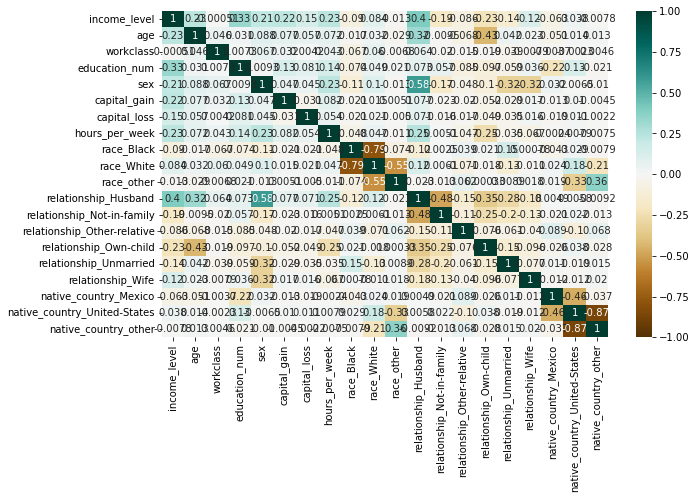

In [49]:
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(method = "pearson"), annot=True, vmin=-1, vmax=1, cmap="BrBG")
plt.show()

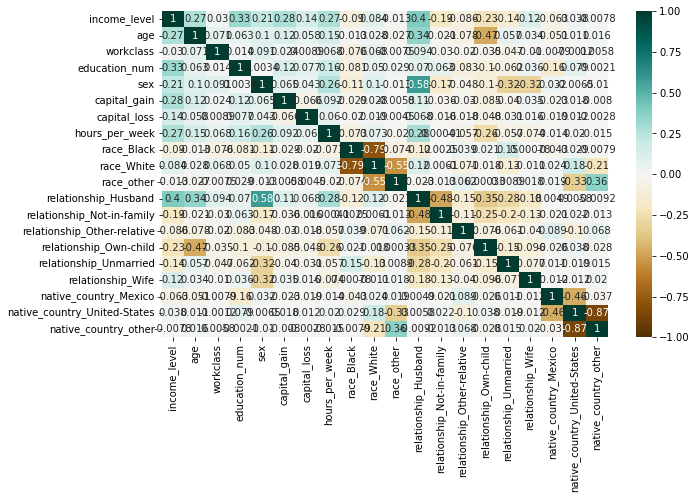

In [50]:
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(method = "spearman"), annot=True, vmin=-1, vmax=1, cmap="BrBG")
plt.show()

Wygląda na to, że nie mamy silnych korelacji. Najbardziej skorelowane z naszą zmienną do predykcji `income_level` są: `age`, `education_num`, `sex`, `hours_per_week`, `Husband`.

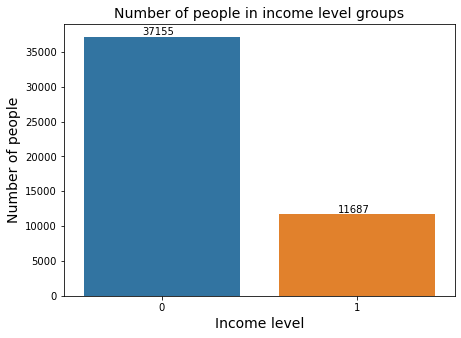

In [51]:
plt.figure(figsize = (7, 5))
ax = sns.countplot(data = data, x = "income_level", label="count")
for p in ax.patches:
        ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()+250))
plt.title("Number of people in income level groups", fontsize=14)
plt.xlabel("Income level", fontsize=14)
plt.ylabel("Number of people", fontsize=14)
plt.show()

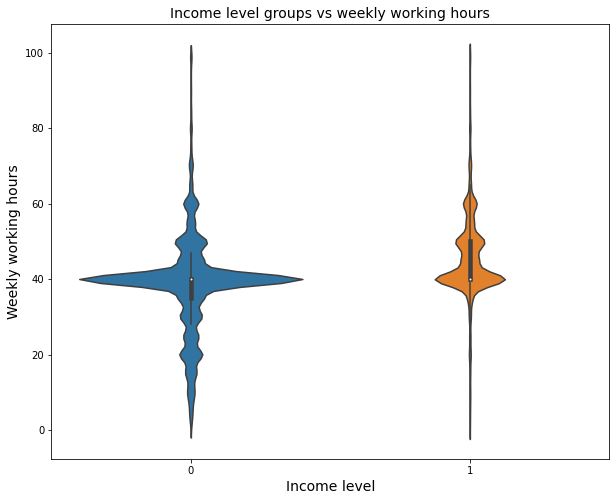

In [52]:
plt.figure(figsize = (10, 8))
sns.violinplot(data=data, x="income_level", y="hours_per_week", scale = "count")
plt.title("Income level groups vs weekly working hours", fontsize=14)
plt.xlabel("Income level", fontsize=14)
plt.ylabel("Weekly working hours", fontsize=14)
plt.show()

Duża część z tych, którzy zarabiają więcej niż 50k to ludzie pracujacy więcej niż 40h/week.

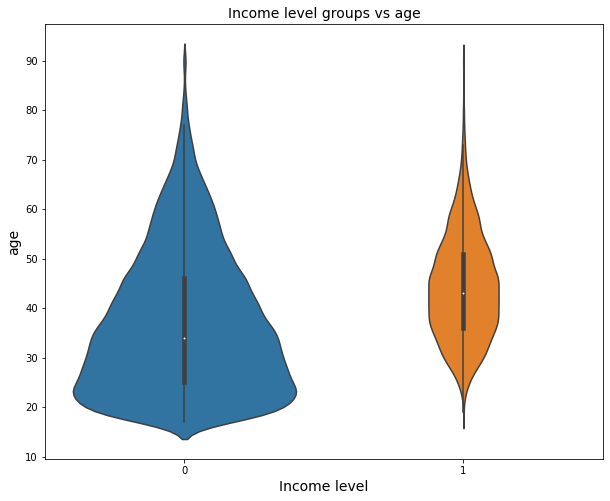

In [53]:
plt.figure(figsize = (10, 8))
sns.violinplot(data=data, x="income_level", y="age", scale = "count")
plt.title("Income level groups vs age", fontsize=14)
plt.xlabel("Income level", fontsize=14)
plt.ylabel("age", fontsize=14)
plt.show()

Widzimy, że rozkład wieku ludzi poniżej naszego progu 50k przypomina piramidę demograficzną, natomiast wykres po prawej - już nie.  
Przypomina on bardziej rozkład normalny, ze średnią około 45 roku życia.

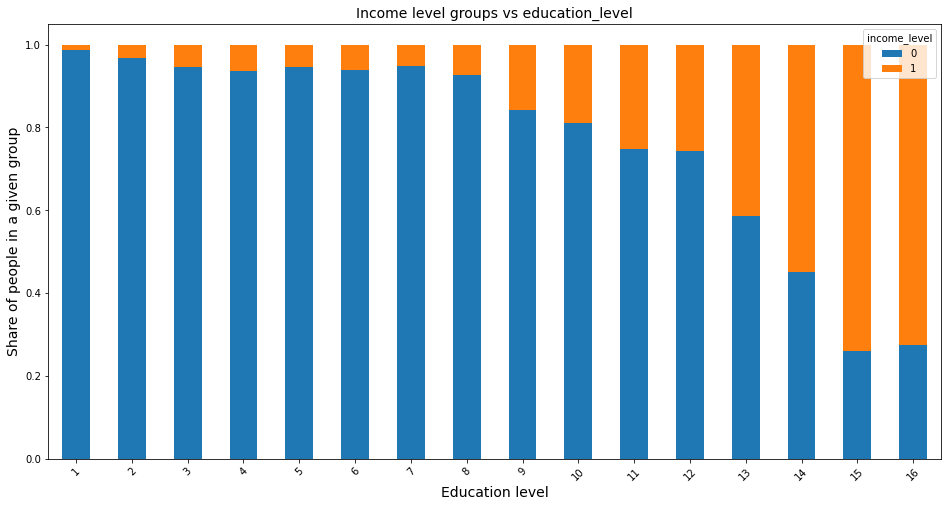

In [54]:
data.groupby('education_num')["income_level"].value_counts(normalize=True).unstack('income_level').plot.bar(stacked=True, figsize = (16, 8))
plt.title("Income level groups vs education_level", fontsize=14)
plt.xticks(rotation = 45)
plt.xlabel("Education level", fontsize=14)
plt.ylabel("Share of people in a given group", fontsize=14)
plt.show()

Widzimy jak silnie poziom edukacji jest związany z prawdopodobieństwem znalezienia się w grupie >50k.

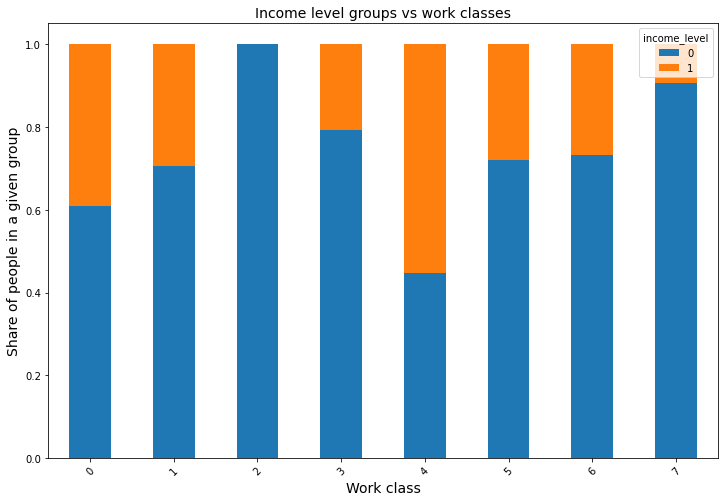

In [55]:
workclasses_plot_data = data.groupby('workclass')["income_level"].value_counts(normalize=True).unstack('income_level')#.sort_values(by = "income_level", ascending = False)
workclasses_plot_data.plot.bar(stacked=True, figsize = (12, 8), sort_columns = True)
plt.xticks(rotation = 45)
plt.title("Income level groups vs work classes", fontsize=14)
plt.xlabel("Work class", fontsize=14)
plt.ylabel("Share of people in a given group", fontsize=14)
plt.show()

Największy % ludzi powyżej progu zarobkowego znajduje się w kategorii `samozatrudnienie`.

## 6. Importowanie tabelki z danymi do CSV
Aby ułatwić pracę w kolejnych etapach, dane po pre-processingu zapiszemy do pliku w formacie CSV. 

In [56]:
data

,income_level,age,workclass,education_num,sex,capital_gain,capital_loss,hours_per_week,race_Black,race_White,race_other,relationship_Husband,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,native_country_Mexico,native_country_United-States,native_country_other
0,0,39,6,13,1,2174.0,0.0,40.0,0,1,0,0,1,0,0,0,0,0,1,0
1,0,50,5,13,1,0.0,0.0,13.0,0,1,0,1,0,0,0,0,0,0,1,0
2,0,38,3,9,1,0.0,0.0,40.0,0,1,0,0,1,0,0,0,0,0,1,0
3,0,53,3,7,1,0.0,0.0,40.0,1,0,0,1,0,0,0,0,0,0,1,0
4,0,28,3,13,0,0.0,0.0,40.0,1,0,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,0,39,3,13,0,0.0,0.0,36.0,0,1,0,0,1,0,0,0,0,0,1,0
48838,0,64,3,9,1,0.0,0.0,40.0,1,0,0,0,0,1,0,0,0,0,1,0
48839,0,38,3,13,1,0.0,0.0,50.0,0,1,0,1,0,0,0,0,0,0,1,0
48840,0,44,3,13,1,5455.0,0.0,40.0,0,0,1,0,0,0,1,0,0,0,1,0


In [57]:
data.to_csv('census_income_dataset_processed.csv')